In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 22s 2us/step


In [9]:
len(x_train),len(y_train)

(60000, 60000)

In [11]:
len(x_test),len(y_test)

(10000, 10000)

In [34]:
x_train.shape[0]

60000

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

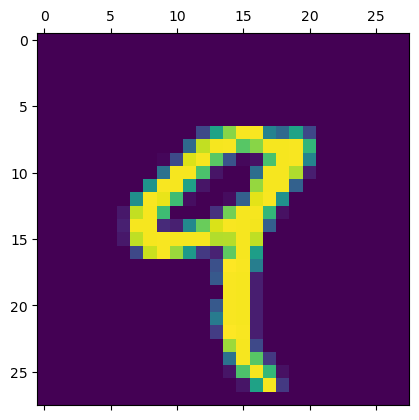

In [16]:
plt.matshow(x_train[4])

In [18]:
y_train[0:7]

array([5, 0, 4, 1, 9, 2, 1], dtype=uint8)

In [19]:
x_train.shape

(60000, 28, 28)

In [44]:
x_train=x_train/255
x_test=x_test/255

In [45]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [46]:
print(x_train_flattened.shape)
x_test_flattened.shape

(60000, 784)


(10000, 784)

In [47]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [48]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(x_train_flattened,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4762 - accuracy: 0.8752
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3040 - accuracy: 0.9156


In [49]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2822 - accuracy: 0.9226


[0.28219667077064514, 0.9225999712944031]

In [50]:
model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


array([[7.5778097e-02, 7.8872617e-06, 1.3589208e-01, ..., 9.9971473e-01,
        1.3364038e-01, 7.1479261e-01],
       [3.0338046e-01, 3.6191726e-03, 9.9543315e-01, ..., 1.1592652e-09,
        1.0648492e-01, 1.6558816e-06],
       [2.9211545e-03, 9.8867273e-01, 5.9534675e-01, ..., 2.3401903e-01,
        4.5294926e-01, 6.8555743e-02],
       ...,
       [3.4439112e-05, 5.1849318e-05, 3.3172953e-03, ..., 3.2274309e-01,
        5.9482533e-01, 8.4240496e-01],
       [1.9087673e-03, 9.4560598e-04, 1.4126854e-03, ..., 3.0580780e-04,
        7.0621920e-01, 1.1795700e-03],
       [4.6593104e-02, 4.2084864e-08, 1.3321449e-01, ..., 1.8055772e-06,
        6.5998407e-04, 2.2257047e-05]], dtype=float32)

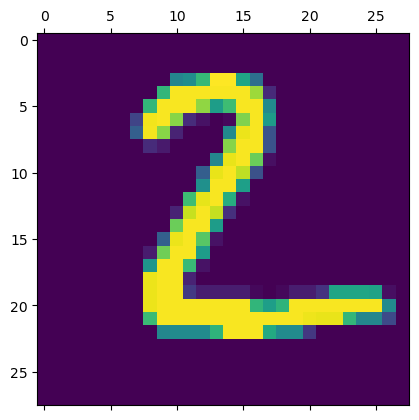

In [55]:
plt.matshow(x_test[1])

In [56]:
y=model.predict(x_test_flattened)
y[1]


313/313 [==============================] - 1s 2ms/step


array([3.0338046e-01, 3.6191726e-03, 9.9543315e-01, 5.7384026e-01,
       7.4579518e-08, 7.1030241e-01, 7.3129046e-01, 1.1592652e-09,
       1.0648492e-01, 1.6558816e-06], dtype=float32)

In [59]:
np.argmax(y[0])

7

In [60]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [68]:
y_predictions_labels=[np.argmax(i) for i in y]
y_predictions_labels[:5]

[7, 2, 1, 0, 4]

In [70]:
cn=tf.math.confusion_matrix(labels=y_test,predictions=y_predictions_lables)
cn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    7,    7,    2,    2,    0],
       [   0, 1107,    2,    2,    0,    2,    4,    2,   16,    0],
       [   8,   10,  909,   20,   12,    3,   13,   10,   42,    5],
       [   3,    0,   14,  933,    0,   23,    1,   11,   19,    6],
       [   1,    1,    3,    1,  907,    0,   13,    2,   10,   44],
       [   9,    2,    2,   40,    7,  774,   14,    6,   31,    7],
       [   9,    3,    5,    2,    8,   18,  909,    2,    2,    0],
       [   1,    7,   23,    9,    5,    0,    0,  951,    2,   30],
       [   4,    6,    6,   27,    9,   30,   10,   13,  863,    6],
       [  10,    6,    2,   12,   21,   10,    0,   28,    6,  914]])>

In [88]:
layer_1=keras.layers.Dense(100,input_shape=(784,),activation='relu')
layer_2=keras.layers.Dense(10,activation='sigmoid' )

In [82]:
model=keras.Sequential([layer_1,layer_2])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(x_train_flattened,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2821 - accuracy: 0.9197
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1254 - accuracy: 0.9630


In [84]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1093 - accuracy: 0.9671


[0.10926707834005356, 0.9671000242233276]

In [85]:
cb=tf.math.confusion_matrix(labels=y_test,predictions=y_predictions_lables)
cb

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    7,    7,    2,    2,    0],
       [   0, 1107,    2,    2,    0,    2,    4,    2,   16,    0],
       [   8,   10,  909,   20,   12,    3,   13,   10,   42,    5],
       [   3,    0,   14,  933,    0,   23,    1,   11,   19,    6],
       [   1,    1,    3,    1,  907,    0,   13,    2,   10,   44],
       [   9,    2,    2,   40,    7,  774,   14,    6,   31,    7],
       [   9,    3,    5,    2,    8,   18,  909,    2,    2,    0],
       [   1,    7,   23,    9,    5,    0,    0,  951,    2,   30],
       [   4,    6,    6,   27,    9,   30,   10,   13,  863,    6],
       [  10,    6,    2,   12,   21,   10,    0,   28,    6,  914]])>